In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
df = pd.read_csv('hasil_kluster_data_lanjutan.csv', names = ['Latitude','Longitude','Depth','Magnitude','Cluster'])
df.head()

,Latitude,Longitude,Depth,Magnitude,Cluster
0,-7.555067,122.248034,12.193,7.3,0
1,-7.520367,122.276527,9.908,5.7,0
2,-7.661919,122.291383,12.201,5.8,0
3,-7.613724,121.543867,11.237,5.5,0
4,-7.781743,122.403823,9.906,5.5,0


In [3]:
df.head(100)

,Latitude,Longitude,Depth,Magnitude,Cluster
0,-7.555067,122.248034,12.193,7.3,0
1,-7.520367,122.276527,9.908,5.7,0
2,-7.661919,122.291383,12.201,5.8,0
3,-7.613724,121.543867,11.237,5.5,0
4,-7.781743,122.403823,9.906,5.5,0
...,...,...,...,...,...
95,-7.549558,121.553928,20.320,3.0,2
96,-7.567389,121.633202,11.692,2.5,0
97,-7.345690,121.844225,15.237,2.6,2
98,-7.528815,121.893012,9.955,3.1,0


In [125]:
# merangkum data
df.describe()

,Latitude,Longitude,Depth,Magnitude,Cluster
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,-7.546786,121.917847,10.993800,2.908054,0.722024
std,0.245482,0.524075,3.171344,0.514511,0.754251
min,-8.093919,120.473149,3.698000,1.900000,0.000000
25%,-7.677511,121.589335,8.736500,2.600000,0.000000
50%,-7.549291,122.022538,10.633000,2.800000,1.000000
75%,-7.447439,122.388460,12.800000,3.100000,1.000000
max,-6.618195,122.721286,22.141000,7.300000,2.000000


In [4]:
cdf = df[['Latitude','Longitude','Depth','Magnitude','Cluster']]
cdf.head(10)

,Latitude,Longitude,Depth,Magnitude,Cluster
0,-7.555067,122.248034,12.193,7.3,0
1,-7.520367,122.276527,9.908,5.7,0
2,-7.661919,122.291383,12.201,5.8,0
3,-7.613724,121.543867,11.237,5.5,0
4,-7.781743,122.403823,9.906,5.5,0
5,-7.759707,122.496741,7.020,5.1,1
6,-7.540304,122.125964,16.634,5.1,2
7,-7.498009,121.805473,17.609,5.0,2
8,-7.537981,121.691665,12.742,5.3,0
9,-7.615615,122.177868,9.537,4.4,1


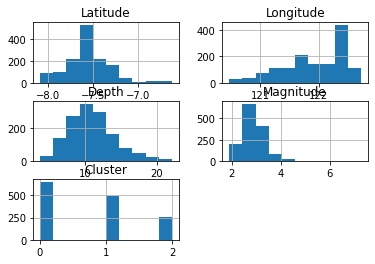

In [5]:
viz = cdf[['Latitude','Longitude','Depth','Magnitude','Cluster']]
viz.hist()
plt.show()

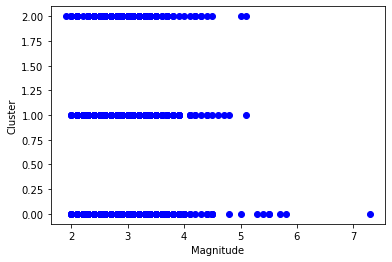

In [6]:
plt.scatter(cdf.Magnitude, cdf.Cluster,  color='blue')
plt.xlabel("Magnitude")
plt.ylabel("Cluster")
plt.show()

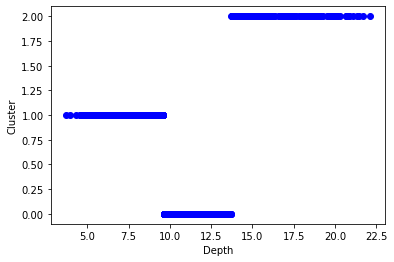

In [7]:
plt.scatter(cdf.Depth, cdf.Cluster,  color='blue')
plt.xlabel("Depth")
plt.ylabel("Cluster")
plt.show()

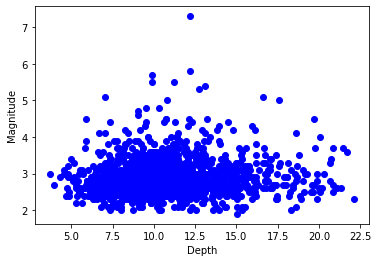

In [8]:
plt.scatter(cdf.Depth, cdf.Magnitude,  color='blue')
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.show()

In [9]:
# Mengambil "Magnitude" sebagai variabel independen (regressor)
X = cdf.iloc[:, 3].values
# Mengambil "Cluster" sebagai variabel dependen
y = cdf.iloc[:, 4].values
# Reshape data karena hanya menggunakan satu fitur "Magnitude"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

In [10]:
X = cdf.iloc[:, 3].values
X

array([7.3, 5.7, 5.8, ..., 2.2, 2.5, 2. ])

In [11]:
y = cdf.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 1])

In [12]:
X = X.reshape(-1,1)
X

array([[7.3],
       [5.7],
       [5.8],
       ...,
       [2.2],
       [2.5],
       [2. ]])

In [13]:
y = y.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [16]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

In [17]:
# Predicting a new result

y_pred = regressor.predict(sc_X.transform(np.array([[5.4]])))
#To transform 5.4 to the scaled X value, we first need to convert it into the array form
#Since the transform method of StandardScaler Library only accepts arrays

y_pred = sc_y.inverse_transform(y_pred)
#Now the prediction gives us the scaled value of y
#Thus we need inverse transformation of the scaled value for the real results

print(y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.95761493].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


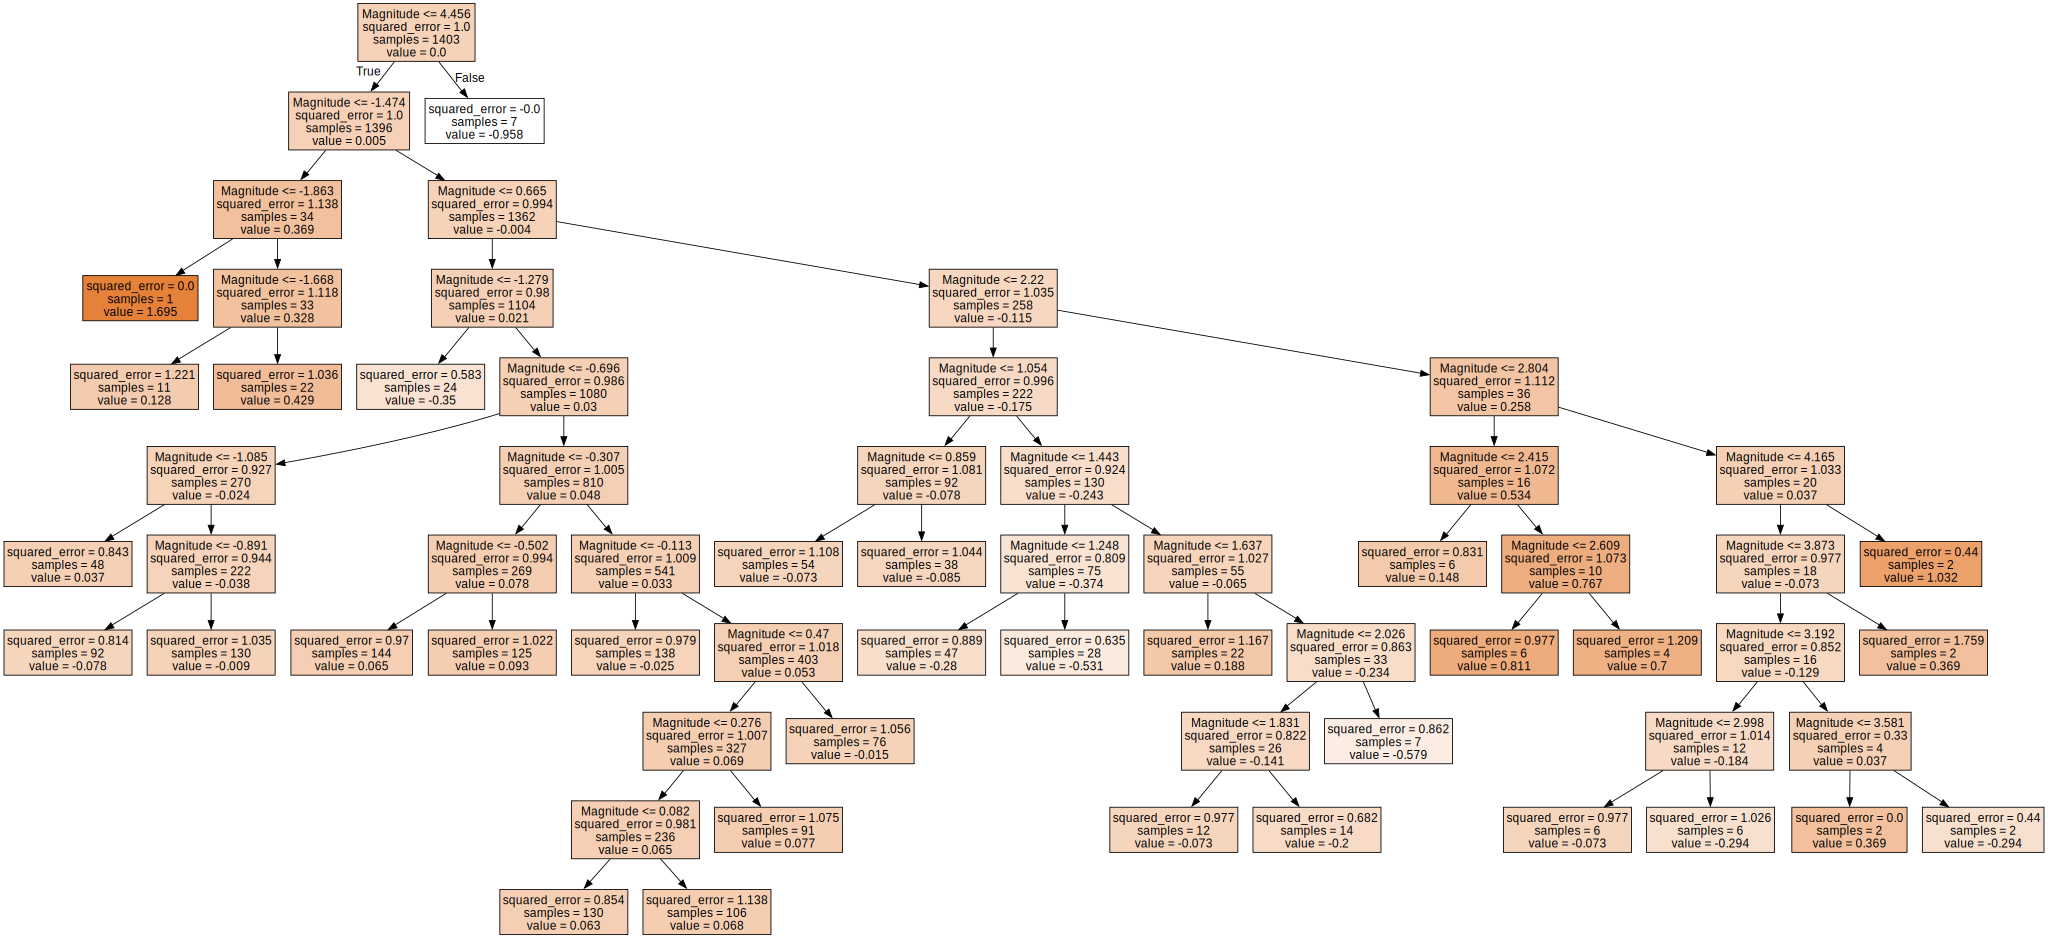

In [21]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# DOT data
dot_data = export_graphviz(regressor, out_file=None, feature_names=['Magnitude'],  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [22]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['Magnitude']])
test_y = np.asanyarray(cdf[['Cluster']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

ValueError: Expected 2D array, got 1D array instead:
array=[-0.95761493 -0.95761493 -0.95761493 ... -0.34973112 -0.00880607
  0.12753303].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Random Forest

In [24]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X, y)

/var/folders/zv/n2g_d_rx61z5l6fj0mt0bzp80000gn/T/ipykernel_12713/1489805368.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


RandomForestRegressor()

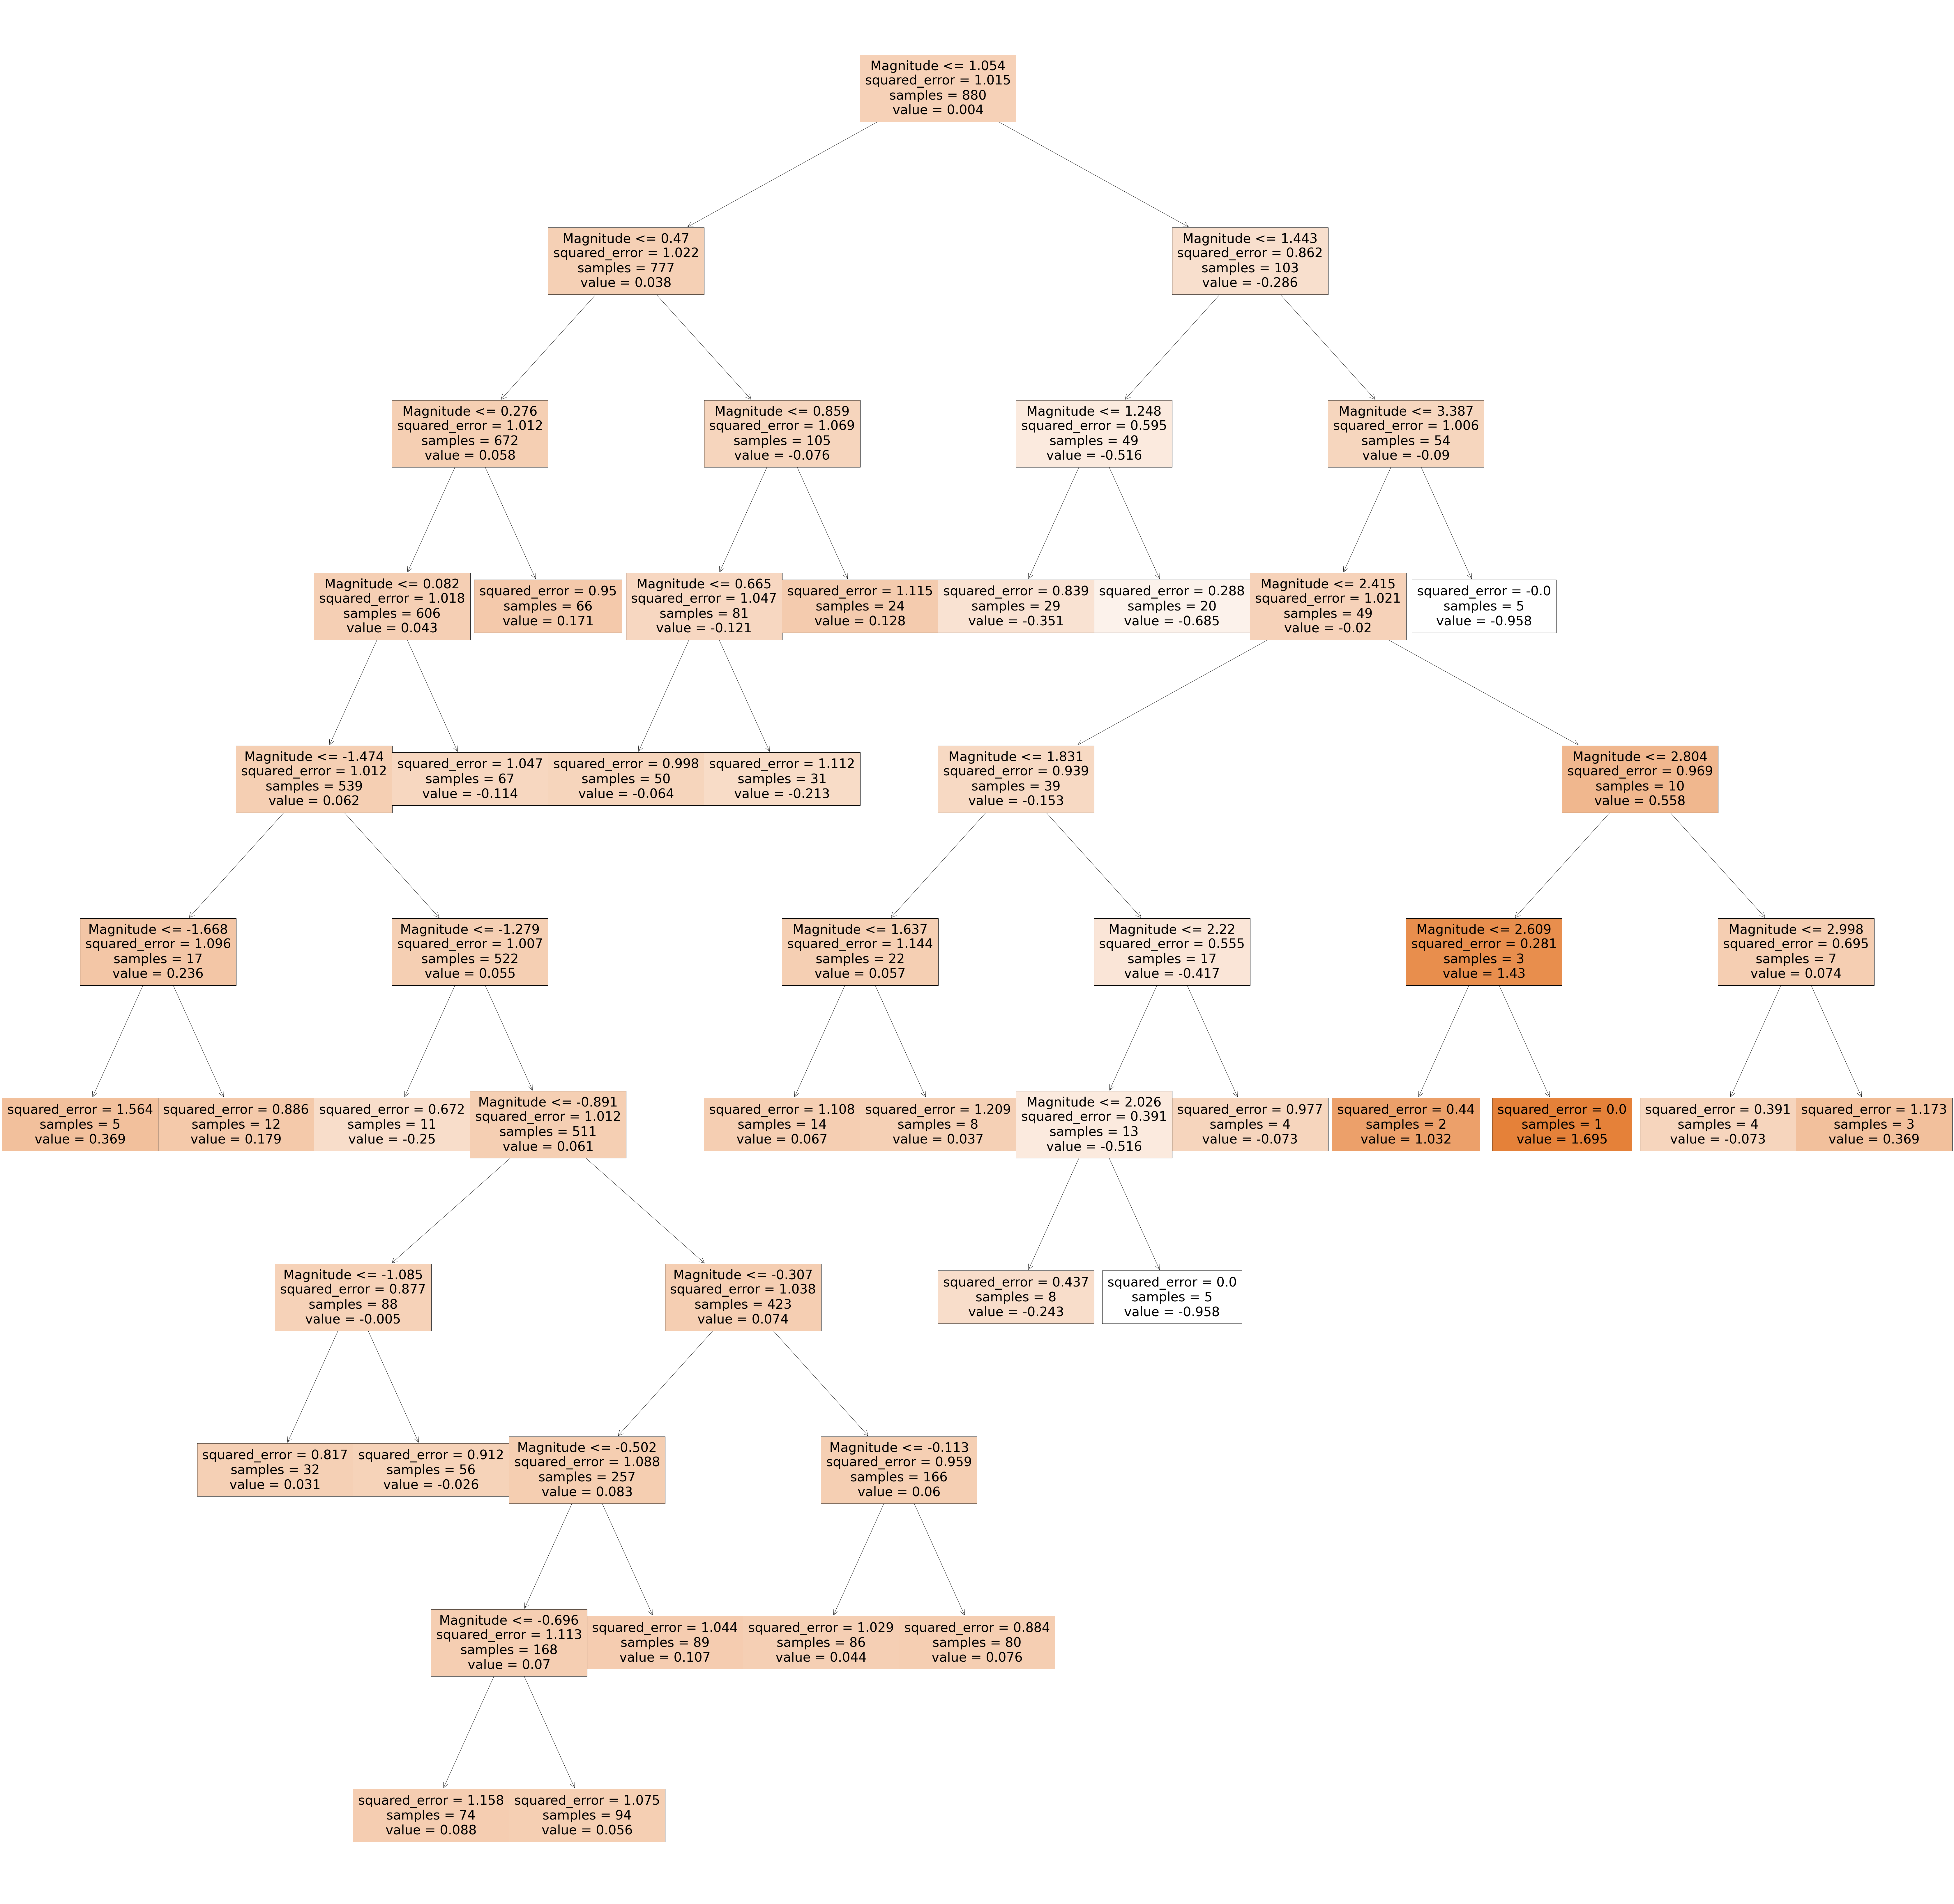

In [28]:
from sklearn import tree
plt.figure(figsize=(120,120))
graph = tree.plot_tree(regressor.estimators_[0], feature_names=['Magnitude'], filled=True)

In [143]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [144]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['Magnitude']])
test_y = np.asanyarray(cdf[['Cluster']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

ValueError: ignored

SVR

In [145]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
#linear = Linear Kernel
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [146]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [147]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['Magnitude']])
test_y = np.asanyarray(cdf[['Cluster']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

ValueError: ignored

Variabel Jamak

In [148]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [149]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Depth','Magnitude']])
train_y = np.asanyarray(train[['Cluster']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.07199352 -0.08004085]]
Intercept:  [0.17553071]


In [150]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['Depth','Magnitude']])
test_y = np.asanyarray(cdf[['Cluster']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.69
Residual sum of squares (MSE): 0.51
R2-score: -8.70


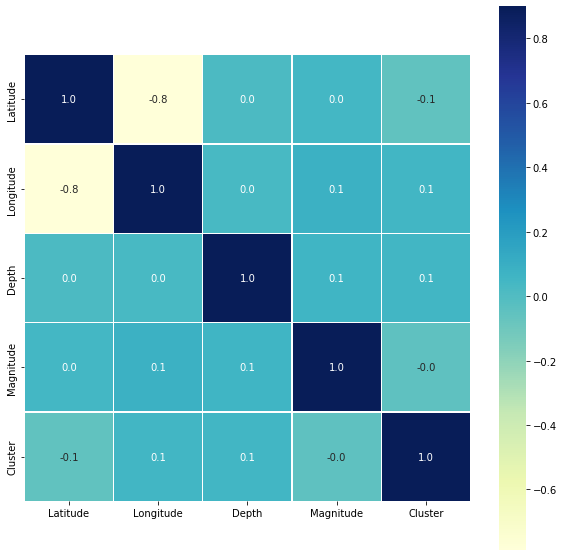

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
SpearmanCorr = df.corr(method="spearman")
plt.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')